<a href="https://colab.research.google.com/github/dreaazy/Mental-Health-Insights-of-Vulnerable-Cancer-Patients/blob/master/PiccininiSimone_5BM__Progetto_IA_ML_Classico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Image Alt Text](https://storage.googleapis.com/kaggle-datasets-images/4224082/7284561/c664ded426284f9b3c2f79b809a7a91d/dataset-cover.jpg?t=2023-12-26-13-58-32)
##The aim of this project is to perform sentimental analysis on a dataset containing mental health insights of vulnerable cancer patients.
This model is going to do a multi-class classification, to distinguish the emotion that the text transmit, the classes are positive, neutral, negative and very negative.

You can find the dataset from this link: [Mental Health Insights](https://www.kaggle.com/datasets/irinhoque/mental-health-insights-vulnerable-cancer-patients).

For training this model I used TF-IDF for extracting the features and SVM for training the model.



#Importing the dataset from github and all the dependecies

In [3]:
# Importing the Support Vector Machine (SVM)
from sklearn.svm import SVC
# Importing TF-IDF Vectorizer for text data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
# Importing function for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Importing metrics for evaluating the model's performance
from sklearn.metrics import accuracy_score, classification_report
# Importing pandas for handling and manipulating datasets
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [4]:
!wget https://raw.githubusercontent.com/dreaazy/Mental-Health-Insights-of-Vulnerable-Cancer-Patients/master/mental_health_dataset.csv

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('mental_health_dataset.csv')


--2024-01-07 18:41:38--  https://raw.githubusercontent.com/dreaazy/Mental-Health-Insights-of-Vulnerable-Cancer-Patients/master/mental_health_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12373753 (12M) [text/plain]
Saving to: ‘mental_health_dataset.csv.1’

mental_health_datas 100%[===================>]  11.80M  30.9MB/s    in 0.4s    

2024-01-07 18:41:39 (30.9 MB/s) - ‘mental_health_dataset.csv.1’ saved [12373753/12373753]



# Specify features (X) and target variable for binary classification

In [5]:

X = df['posts']
y_classification = df['predicted']

# Split the dataset into training and testing sets
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Vectorizer

> It's a technique to extract features from text in my dataset. Without it, it wouldn't be possible to utilize SVM for binary classification.



##**Term frequency:** Measures how frequently a term (word) occurs in a document.
##**Inverse Document Frequency:** Measures the importance of a term across a collection of documents.
![Image Alt Text](https://www.kdnuggets.com/wp-content/uploads/awan_convert_text_documents_tfidf_matrix_tfidfvectorizer_3.png)




In [6]:

# Handle missing values in the 'posts' column to avoid problems in the elaboration of data
df['posts'] = df['posts'].fillna('')

# Specify features (X) and target variable for binary classification
X = df['posts']
y_classification = df['predicted']

# Split the dataset into training and testing sets
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b')  # Remove non-alphabetic words from the vocabulary

# Handle missing values in the training and testing sets
X_train = X_train.fillna('')
X_test = X_test.fillna('')


#in this line of code I'm going to fit the vectorizer on the training data (X_train) and transform it into a TF-IDF matrix.
X_train_tfidf = vectorizer.fit_transform(X_train)
#this line is used to apply the vocabulary learned during the fitting process to the test data (X_test), transforming it into a TF-IDF matrix.
X_test_tfidf = vectorizer.transform(X_test)

# Convert TF-IDF matrices to DataFrames
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# rows of the matrix that are going to display
num_rows_to_display = 10

print(f"TF-IDF Matrix for Training Data (First {num_rows_to_display} rows):")
print(df_train_tfidf.head(num_rows_to_display))

print(f"\nTF-IDF Matrix for Testing Data (First {num_rows_to_display} rows):")
print(df_test_tfidf.head(num_rows_to_display))


TF-IDF Matrix for Training Data (First 10 rows):
          a   aa  aaa  aaaaaaaaaaaaaahhhhhhhhhhhhh  aaah  aaand  aaarggghhh  \
0  0.068279  0.0  0.0                          0.0   0.0    0.0         0.0   
1  0.160854  0.0  0.0                          0.0   0.0    0.0         0.0   
2  0.000000  0.0  0.0                          0.0   0.0    0.0         0.0   
3  0.127312  0.0  0.0                          0.0   0.0    0.0         0.0   
4  0.000000  0.0  0.0                          0.0   0.0    0.0         0.0   
5  0.096882  0.0  0.0                          0.0   0.0    0.0         0.0   
6  0.112266  0.0  0.0                          0.0   0.0    0.0         0.0   
7  0.045789  0.0  0.0                          0.0   0.0    0.0         0.0   
8  0.065502  0.0  0.0                          0.0   0.0    0.0         0.0   
9  0.053802  0.0  0.0                          0.0   0.0    0.0         0.0   

   aaarggharoooooo  aabb  aah  ...  zpack  zpak  zucchinni   zw  zyban  \
0      

##If you want to analyze the words more thoroughly that we are going to work on, executing this cell will save you a text file with all the words that we are going to include in the model for binary classification.

In [7]:
# Save the vocabulary to a text file
with open('vocabulary.txt', 'w') as file:
    for word in vectorizer.get_feature_names_out():
        file.write(word + '\n')

print("Vocabulary saved to 'vocabulary.txt'")

Vocabulary saved to 'vocabulary.txt'


#Instantiate SVM model for classification:

In [13]:
svm_classifier = SVC(kernel='linear')

#Fit the SVM model with training data:

In [14]:

svm_classifier.fit(X_train_tfidf, y_train_classification)


SVC(kernel='linear')

#Make predictions on the testing data:


In [15]:
# Predictions for binary classification
y_pred_classification = svm_classifier.predict(X_test_tfidf)

#Evaluate the model performance:

In [16]:
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
classification_report_classification = classification_report(y_test_classification, y_pred_classification)

print(f'Accuracy for Binary Classification: {accuracy_classification}')
print('Classification Report for Binary Classification:\n', classification_report_classification)

Accuracy for Binary Classification: 0.7527657527657527
Classification Report for Binary Classification:
                precision    recall  f1-score   support

     negative       0.69      0.79      0.74       793
      neutral       0.83      0.81      0.82       905
     positive       0.66      0.33      0.44       128
very negative       0.73      0.68      0.70       253

     accuracy                           0.75      2079
    macro avg       0.73      0.65      0.67      2079
 weighted avg       0.75      0.75      0.75      2079



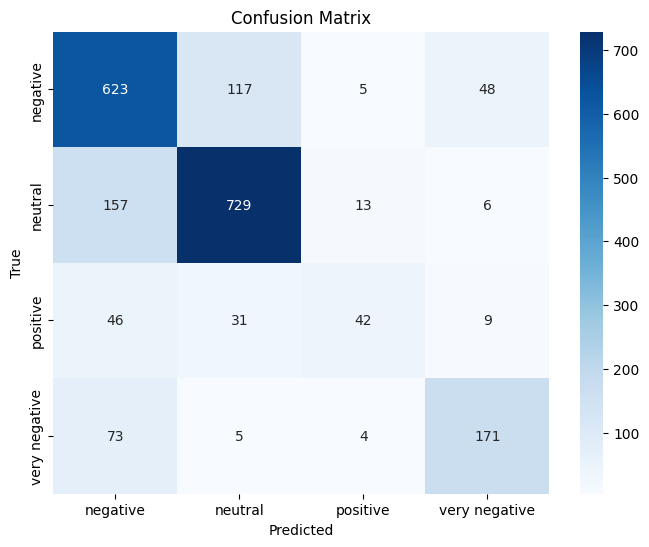

In [17]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification, labels=df['predicted'].unique())

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['predicted'].unique(), yticklabels=df['predicted'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
